# Employee attrition data case study

### ATTRIBUTE INFORMATION:  
Uncover the factors that lead to employee attrition and explore important questions such as ‘show me a breakdown of distance from home by job role and attrition’ or ‘compare average monthly income by education and attrition’. This is a fictional data set created by IBM data scientists. 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 


**Education**

1 'Below College' 

2 'College' 

3 'Bachelor' 

4 'Master' 

5 'Doctor'


**Environment Satisfaction**


1 'Low' 

2 'Medium' 

3 'High' 

4 'Very High' 

**Job Involvement** 

1 'Low' 

2 'Medium' 

3 'High' 

4 'Very High' 


**Job Satisfaction 
1 'Low' 
2 'Medium'
3 'High' 
4 'Very High' 


Performance Rating 
1 'Low' 
2 'Good' 
3 'Excellent' 
4 'Outstanding' 
Relationship Satisfaction 
1 'Low' 
2 'Medium' 
3 'High' 
4 'Very High' 
Work 
Life Balance 
1 'Bad' 
2 'Good' 
3 'Better' 
4 'Best' 
 

 

In [77]:
# importing the required libraries

import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import statsmodels.api as sma
from sklearn.metrics import confusion_matrix, cohen_kappa_score, roc_curve, roc_auc_score, classification_report
from pylab import rcParams

In [2]:
rcParams['figure.figsize'] = 25,18

### Read the dataset (tab, csv, xls, txt, inbuilt dataset)

In [3]:
import csv

with open("data_set.csv","r")as file:
    
    reader=csv.reader(file)
    
df=pd.read_csv("data_set.csv")

df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


### Summarizing important observations from the data set 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 917 entries, 0 to 916
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       917 non-null    int64 
 1   Attrition                 917 non-null    object
 2   BusinessTravel            917 non-null    object
 3   DailyRate                 917 non-null    int64 
 4   Department                917 non-null    object
 5   DistanceFromHome          917 non-null    int64 
 6   Education                 917 non-null    int64 
 7   EducationField            917 non-null    object
 8   EmployeeCount             917 non-null    int64 
 9   EmployeeNumber            917 non-null    int64 
 10  EnvironmentSatisfaction   917 non-null    int64 
 11  Gender                    917 non-null    object
 12  HourlyRate                917 non-null    int64 
 13  JobInvolvement            917 non-null    int64 
 14  JobLevel                  

In [8]:
print('Shape of the data :',df.shape,'\n')
print('Size of the data :',df.size)

Shape of the data : (917, 35) 

Size of the data : 32095


In [9]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,917.000000,917.000000,917.000000,917.000000,917.0,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.0,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
mean,36.938931,785.711014,9.294438,2.921483,1.0,1413.466739,2.738277,66.231189,2.721919,2.044711,2.688113,6452.293348,14428.468920,2.696838,15.214831,3.149400,2.637950,80.0,0.821156,11.179935,2.791712,2.760087,6.972737,4.217012,2.147219,4.062159
std,8.984981,401.902148,8.092566,1.020717,0.0,388.606884,1.103382,20.237536,0.720936,1.100400,1.110097,4685.137761,7188.332799,2.489217,3.640007,0.356677,1.078673,0.0,0.864555,7.802790,1.292917,0.708047,5.951250,3.588223,3.176250,3.571395
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1051.000000,2097.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,444.000000,2.000000,2.000000,1.0,1084.000000,2.000000,49.000000,2.000000,1.000000,2.000000,2933.000000,8018.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,772.000000,7.000000,3.000000,1.0,1425.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4877.000000,14255.000000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1141.000000,14.000000,4.000000,1.0,1737.000000,4.000000,84.000000,3.000000,3.000000,4.000000,8103.000000,20763.000000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1498.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19973.000000,26997.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,36.000000,17.000000,15.000000,17.000000


In [10]:
df.describe(include = 'object')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,917,917,917,917,917,917,917,917,917
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,763,648,597,385,550,203,436,917,656


Inference :

- It can be observed that there are a total of 35 columns out of which 26 are numerical and 9 are categorical.
- Target variable is attrition with yes and no as the two classes.
- The data consists of 917 rows.
- The categorical column job role seems to have the maximum number of unique categories.
- column over18 only has one unique value Y.

### Check for defects in the data. Perform necessary actions to ‘fix’ these defects

In [11]:
# checking for null values

df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

inference : The data has no null/missing values.

In [13]:
# checking for outliers 

df_num = df.select_dtypes(include = np.number)

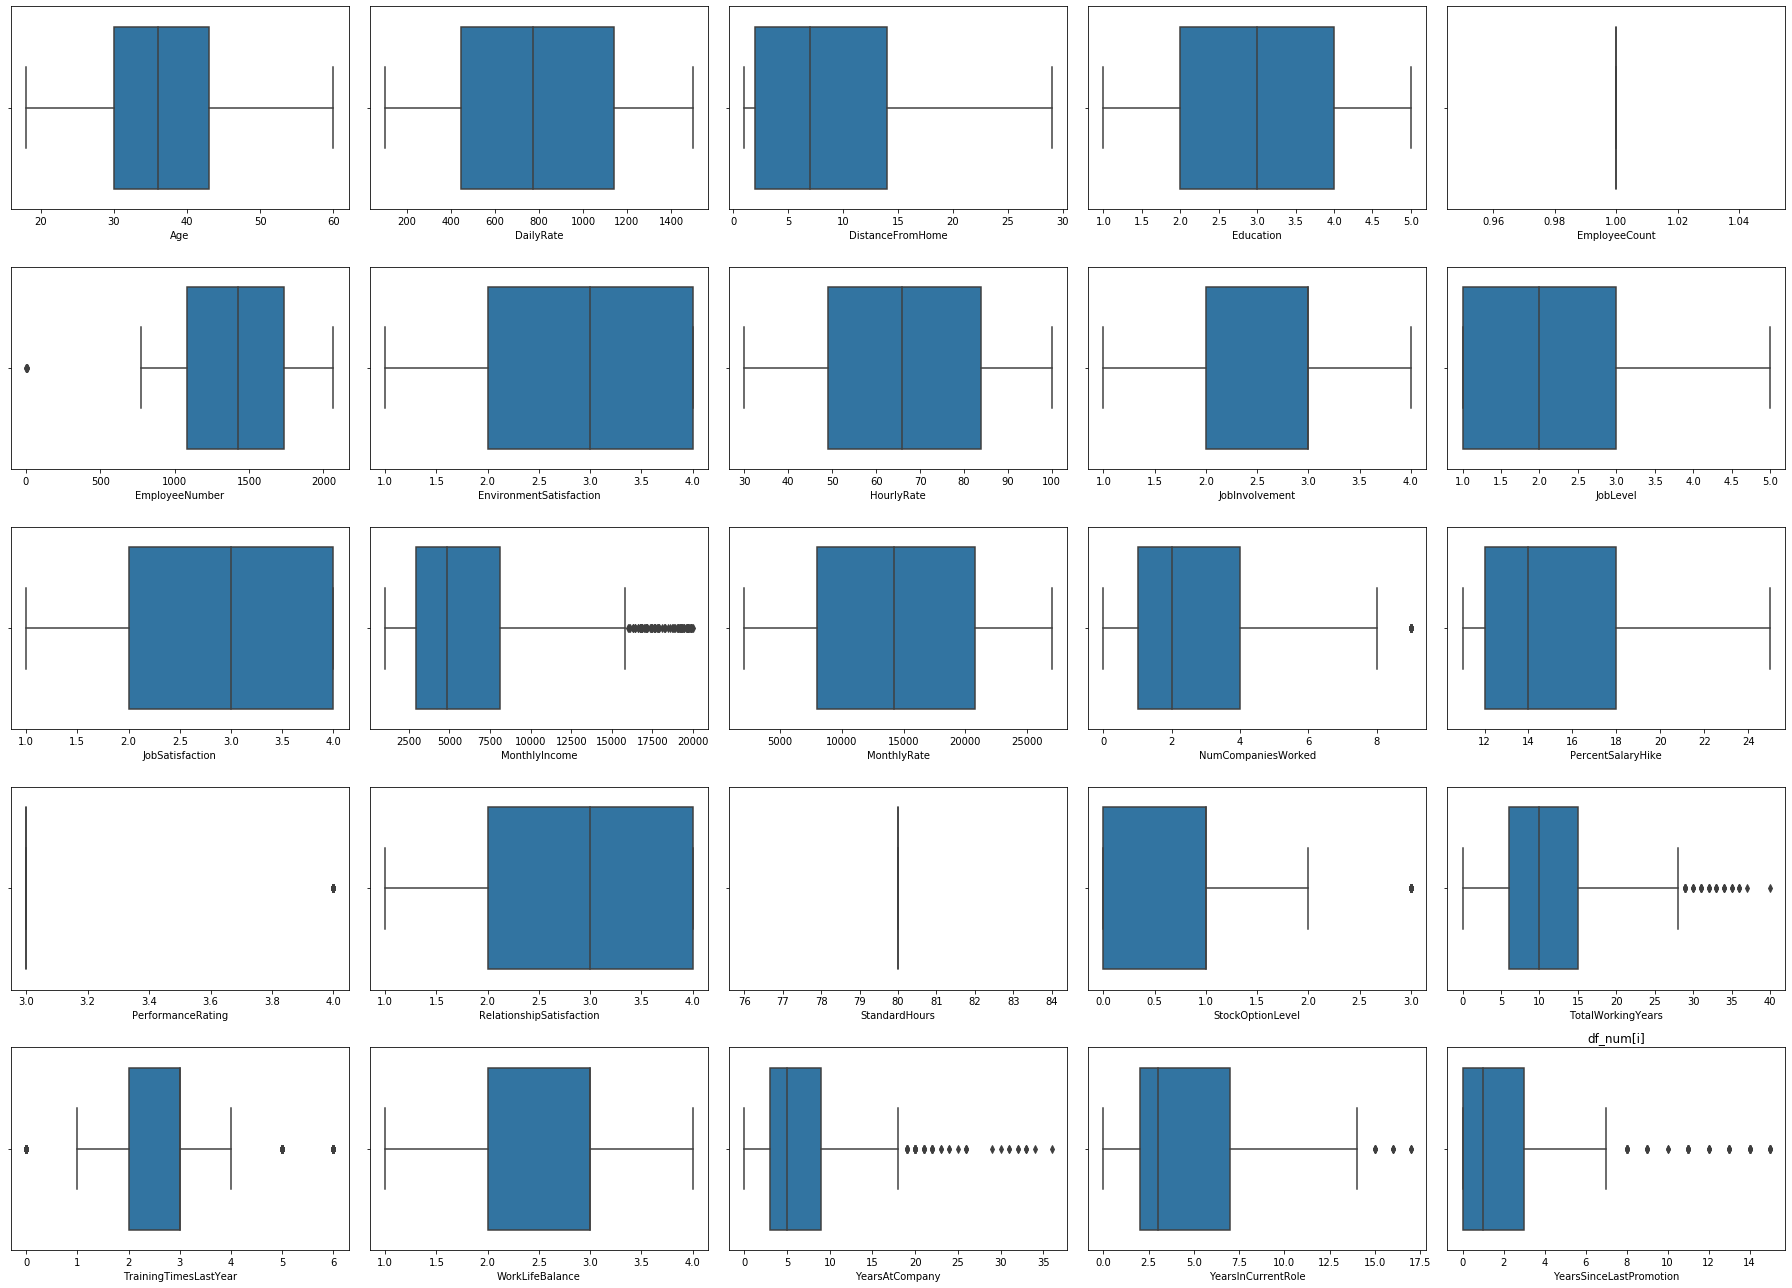

In [16]:
fig, ax = plt.subplots(5,5,figsize = (25,18))

for i,subplots in zip(df_num.columns,ax.flatten()):
    sns.boxplot(df_num[i], ax = subplots)
    plt.title('df_num[i]')
plt.tight_layout()
plt.show()

Inference :

- from the graphs it can be observed that columns monthlyincome, totalworkingyears, yearsatcompany, yearssincelast promotion are the columns with high outliers in the data.

Outlier treatment will not be performed as their is an imbalance in the target variable data, whcich holds a risk of classes being eliminated after the process.

In [17]:
df.kurt()

Age                        -0.405990
DailyRate                  -1.201366
DistanceFromHome           -0.254614
Education                  -0.546001
EmployeeCount               0.000000
EmployeeNumber             -0.497230
EnvironmentSatisfaction    -1.214487
HourlyRate                 -1.213505
JobInvolvement              0.196856
JobLevel                    0.395922
JobSatisfaction            -1.267134
MonthlyIncome               1.090806
MonthlyRate                -1.244785
NumCompaniesWorked         -0.048772
PercentSalaryHike          -0.218000
PerformanceRating           1.885875
RelationshipSatisfaction   -1.229605
StandardHours               0.000000
StockOptionLevel            0.286327
TotalWorkingYears           0.895660
TrainingTimesLastYear       0.623985
WorkLifeBalance             0.376175
YearsAtCompany              3.568162
YearsInCurrentRole          0.386520
YearsSinceLastPromotion     4.099919
YearsWithCurrManager        0.334497
dtype: float64

Inference :

- years at company is displaying mesokurtic behaviour as it's kurtosis score is 3.5. This variable seems to have a more normally distributed datapoints and flatter tails
- Column yearssincelastpromotion displays platykurtic behaviour, as it's kurt score is more than three. There seems to be presence of outliers in more variance.
- All the other columns show leptokurtic behaviour as their kurtosis score is less than 3. It indicates that these columns have low amount of outliers but theor datapoints are not as much scattered and around the mean of the data.

In [23]:
df.skew()

Age                         0.392743
DailyRate                   0.044223
DistanceFromHome            0.926858
Education                  -0.323828
EmployeeCount               0.000000
EmployeeNumber             -0.216251
EnvironmentSatisfaction    -0.343666
HourlyRate                 -0.057398
JobInvolvement             -0.473332
JobLevel                    1.034714
JobSatisfaction            -0.278329
MonthlyIncome               1.398515
MonthlyRate                 0.007792
NumCompaniesWorked          1.007112
PercentSalaryHike           0.840310
PerformanceRating           1.970220
RelationshipSatisfaction   -0.194277
StandardHours               0.000000
StockOptionLevel            0.942350
TotalWorkingYears           1.138436
TrainingTimesLastYear       0.564988
WorkLifeBalance            -0.526506
YearsAtCompany              1.682701
YearsInCurrentRole          0.892458
YearsSinceLastPromotion     2.063932
YearsWithCurrManager        0.903035
dtype: float64

Inference :

- Columns education, employee number, environment satisfaction, hourly rate, job involvement, job satisfaction, relationshipsatisfaction, worklifebalance are displaying a slightly negatively left skewed distribution among their datapoints.
- All the other columns have a positively skewed distribution among datapoints. Which means that the datapoints have a almost normal to slightly right skewed distribution of datapoints.

In [24]:
# checking for wrongly identified datatypes

df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

Inference : All the columns are correctly identified.

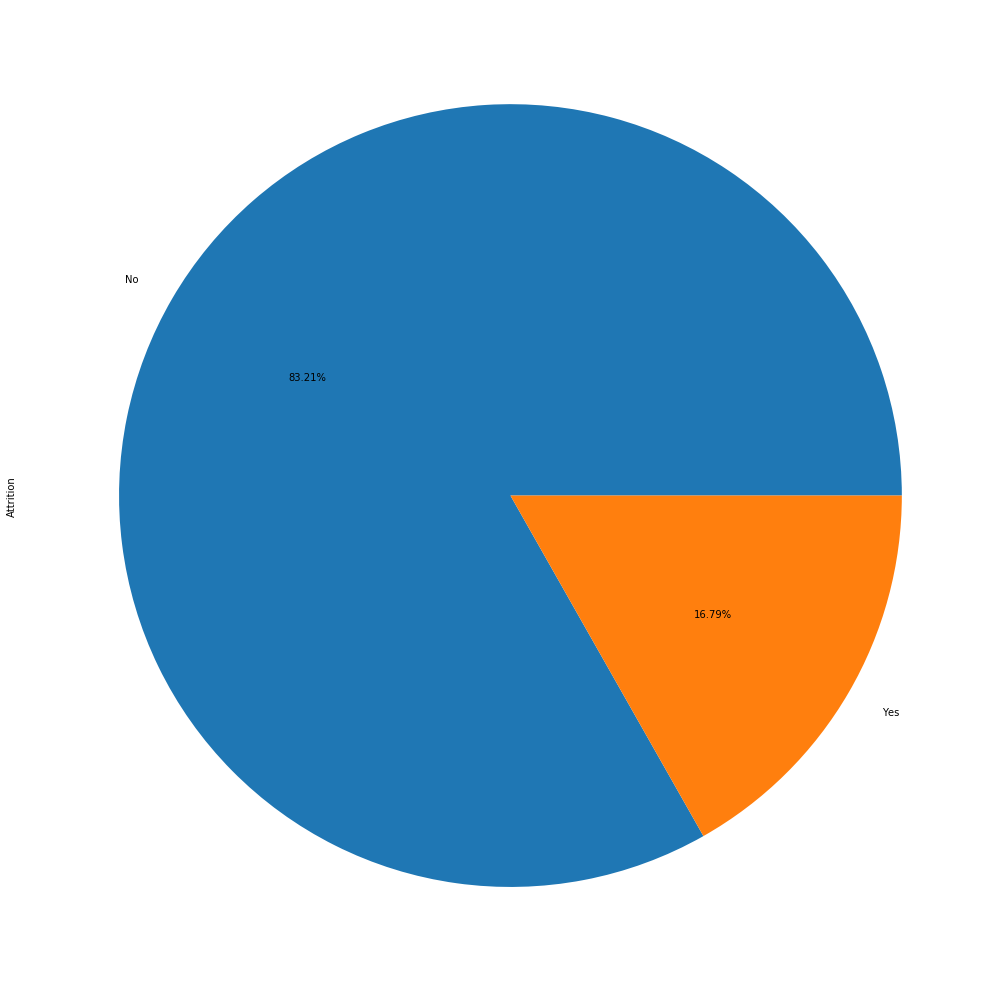

In [26]:
# checking for distribution of data in target variable.
# attrition is our target variable

df['Attrition'].value_counts().plot(kind = 'pie',autopct = '%1.2f%%')

Inference :

- It can be observed that the data distribution is highly imbalanced among the classes of target variable.
- With Yes class holding only 16.79% weightage of the data.
- This can be rectified by performing over sampling.

### summurazing relation among variables

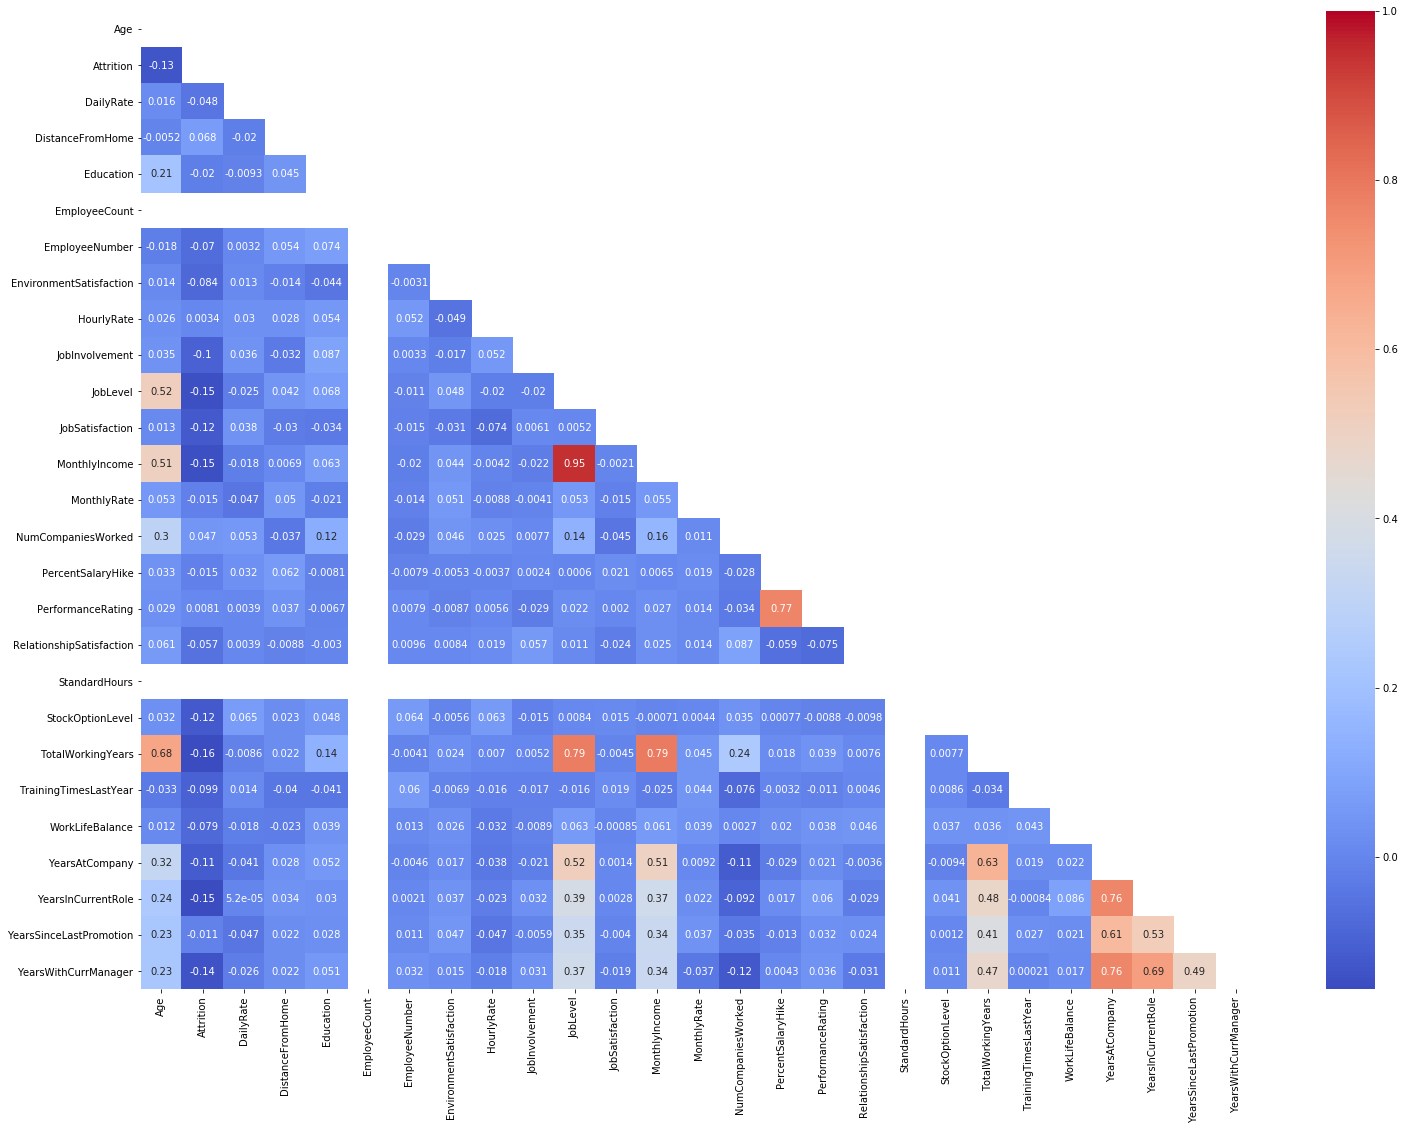

In [41]:
#To check the relation of numerical variables with each otherand target variable.

sns.heatmap(df.corr(),annot = True,cmap = 'coolwarm',mask = np.triu(df.corr()))

Inference :

- Totalworking years shares a moderately high correltion with worklifebalance, yearsatcurrentrole,yearssincelastpromotion, yearswithcurrentmanager.
- Columns yearsatcompany shares a high correlation with columns yearsincurrentrole, yearssincelastpromotion, yearswithcurrentmanager.
- Yearsincurrentrole column shares a moderate correlation with years sincelastpromotion,yearswithcurrentmanager.
- The independent columns share a moderate to low correlation with each other.
- The Target variable attrtion shares a low negative correlation with all the variables.

#### Data Preparation :

##### Feature Engineering :

In [37]:
# For the target variable, its in categorical format.
# we'll have to encode it first to make sure it is readable during the model building

df['Attrition'].unique()

array(['Yes', 'No'], dtype=object)

In [39]:
def attr(x):
    if x == 'Yes':
        return 1
    else:
        return 0

df['Attrition'] = df['Attrition'].apply(attr)
df['Attrition']

0      1
1      0
2      1
3      0
4      0
      ..
912    0
913    0
914    0
915    0
916    0
Name: Attrition, Length: 917, dtype: int64

In [40]:
#Changing the datatype of attrition column

df['Attrition'] = pd.to_numeric(df['Attrition'])
df.dtypes

Age                          int64
Attrition                    int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [46]:
#for categorical coumns

df_cat = df.select_dtypes(exclude = np.number)

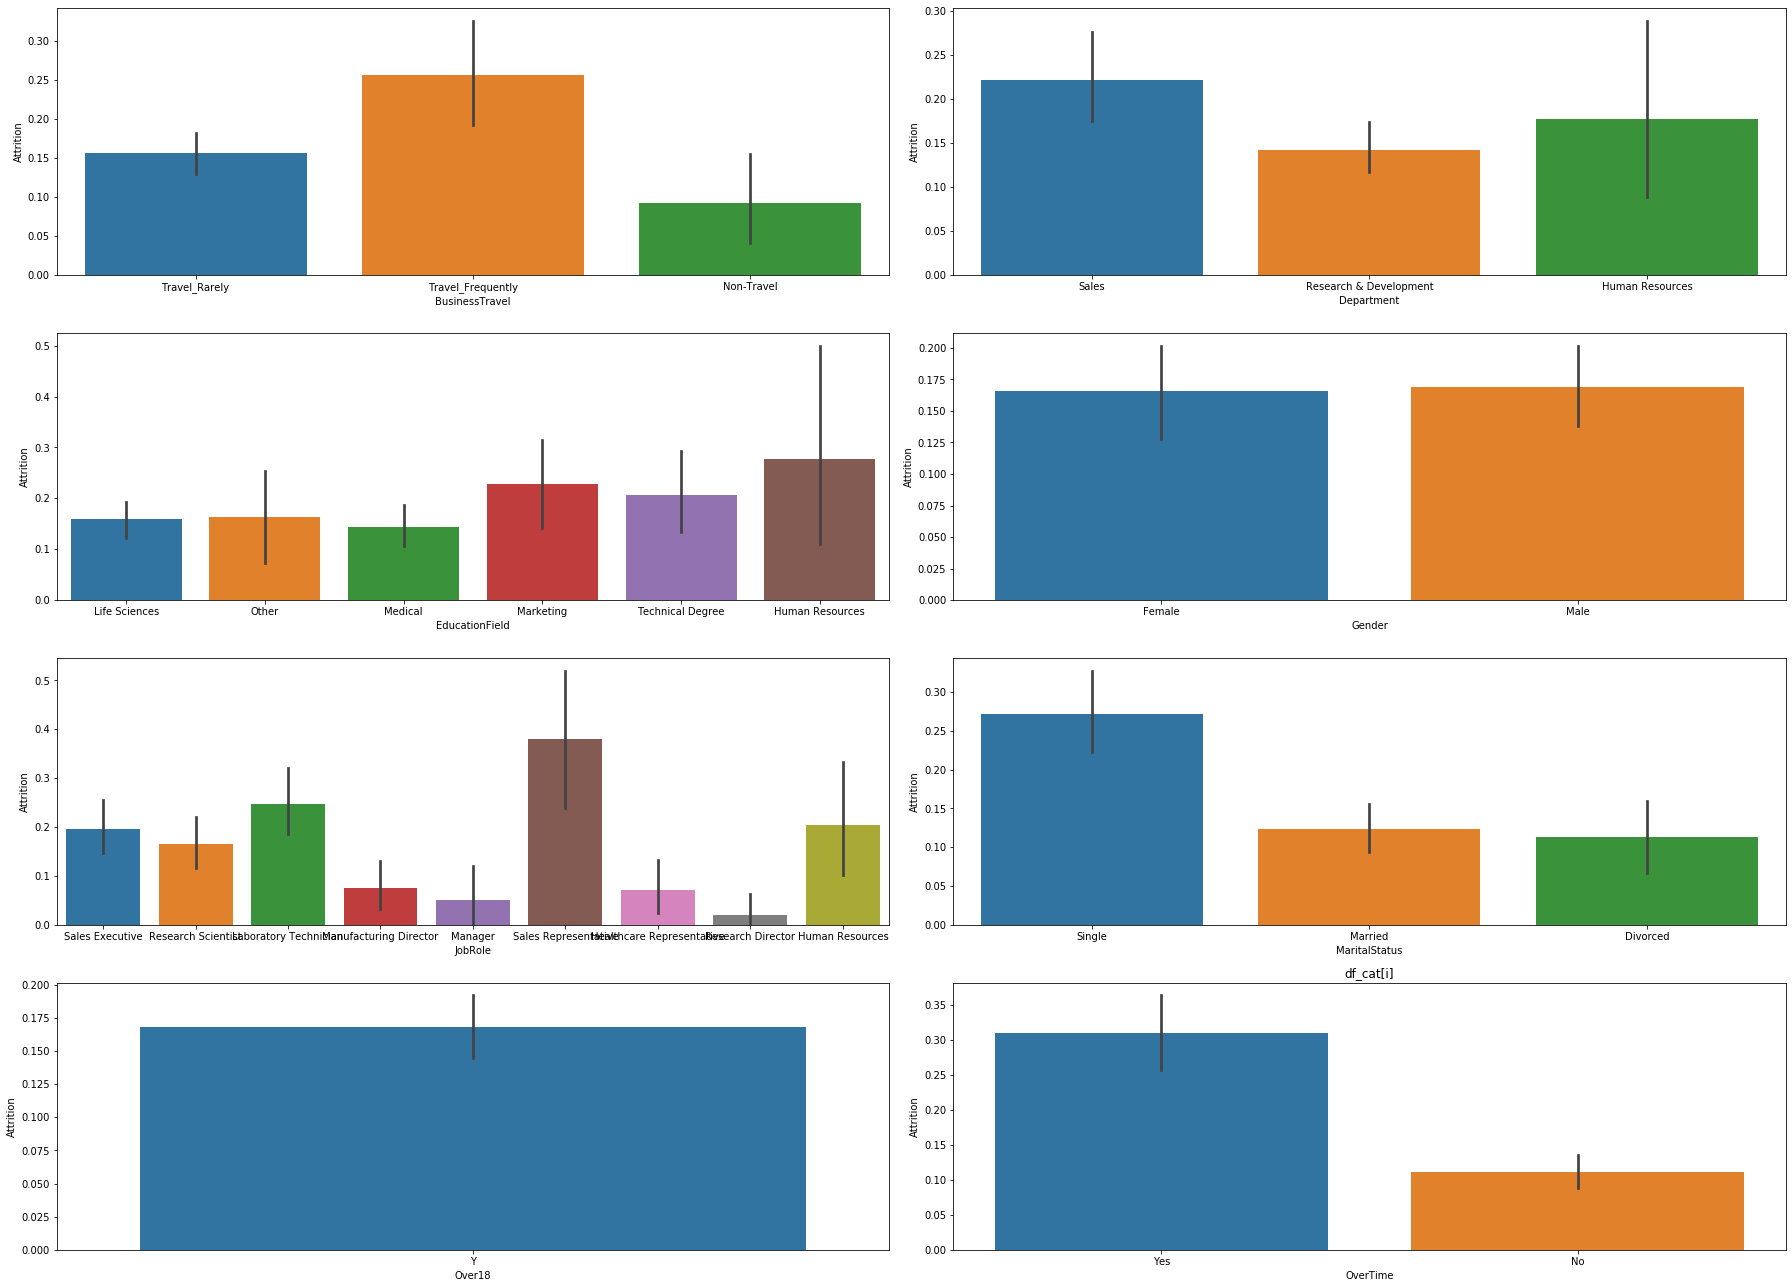

In [49]:
fig, ax = plt.subplots(4,2,figsize = (25,18))

for i,subplots in zip(df_cat.columns,ax.flatten()):
    sns.barplot(df_cat[i], df['Attrition'], ax = subplots,)
    plt.title('df_cat[i]')
plt.tight_layout()
plt.show()

Inference :

- The data distribution of attrition in businesstravel seems to be higher for travel_frequently, and lower for non-travel.
- The data in over 18 column is equally distrbuted as the column only has one class, it would be safe to drop this columns as it does not provide any variation of data that can contribute to different patterns in the data.

##### Statistical tests :

we can also determine the significance of columns by conducting statistical tests.

since categorical columns are involved we will be using anova test to determine the significance of each class in the category wrt to the target variable

    -H0 : The classes of the variable are significant
    -H1 : the classes of the variable are not significant
    
alpha : 0.05    

In [51]:
df_cat.columns

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [52]:
# for business travel

df['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [54]:
rarely_travel = df[df['BusinessTravel']=='Travel_Rarely']['Attrition']
frequently_travel = df[df['BusinessTravel']=='Travel_Frequently']['Attrition']
no_travel = df[df['BusinessTravel']=='Non-Travel']['Attrition']

teststat, pval = stats.f_oneway(rarely_travel,frequently_travel,no_travel)
print(pval)

0.0008396299184207072


- Here pvalue is less than alpha. We can determine it as the classes of the column are not significant

In [56]:
#for Gender

male = df[df['Gender']=='Male']['Attrition']
female = df[df['Gender']=='Female']['Attrition']

stats.f_oneway(male,female)

F_onewayResult(statistic=0.013022834680597497, pvalue=0.9091695773659688)

- Pvalue is greater than alpha hence we can conclude that the column gender and it's classes are significant.

In [57]:
# we can determine the significance of a column based on it's standard deviation
# A column with low variance in it's datapoints displays 0 standard deviation.
# Such columns do not usually contribute significantly towards are desired results.

df.std()

Age                            8.984981
Attrition                      0.374016
DailyRate                    401.902148
DistanceFromHome               8.092566
Education                      1.020717
EmployeeCount                  0.000000
EmployeeNumber               388.606884
EnvironmentSatisfaction        1.103382
HourlyRate                    20.237536
JobInvolvement                 0.720936
JobLevel                       1.100400
JobSatisfaction                1.110097
MonthlyIncome               4685.137761
MonthlyRate                 7188.332799
NumCompaniesWorked             2.489217
PercentSalaryHike              3.640007
PerformanceRating              0.356677
RelationshipSatisfaction       1.078673
StandardHours                  0.000000
StockOptionLevel               0.864555
TotalWorkingYears              7.802790
TrainingTimesLastYear          1.292917
WorkLifeBalance                0.708047
YearsAtCompany                 5.951250
YearsInCurrentRole             3.588223


- Columns employeecount, standardhours show a insignificance as their standard deviation is zero.
- we can drop these columns

In [58]:
# from the above tests and observations we will be dropping a few columns

df.drop(['EmployeeCount','StandardHours','Over18'],axis = 1, inplace = True)

In [59]:
# Moving on we will perform encoding on the categorical columns.

df_enc = pd.get_dummies(df,drop_first = True)
df_enc.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1,1102,1,2,1,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
1,49,0,279,8,1,2,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2,37,1,1373,2,2,4,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1
3,33,0,1392,3,4,5,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
4,27,0,591,2,1,7,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0


In [61]:
df.shape

(917, 32)

### 5.	Split dataset into train and test (70:30) (5 marks)
a.	Are both train and test representative of the overall data? How would you ascertain this statistically?


In [62]:
# determining the Dependent and independent variables

X = df_enc.drop('Attrition',axis = 1)
Y = df_enc['Attrition']

In [63]:
# target variable class distribution

print(Y.value_counts().sort_index())

0    763
1    154
Name: Attrition, dtype: int64


In [66]:
#Since there is an imbalance in the data we will perform smote 
#for making sure there is equal wieightage given to the classes

sm = SMOTE(sampling_strategy = 'auto',random_state = 1)

X_new,Y_new = sm.fit_resample(X,Y)

df_smote = pd.concat([X_new,Y_new])

print(Y_new.value_counts().sort_index())

0    763
1    763
Name: Attrition, dtype: int64


- the classes are balanced now

In [68]:
# we will perform scaling on the data as we will be building a logistic regression model as our base model.

sc = StandardScaler()

X_scaled = pd.DataFrame(sc.fit_transform(X_new),columns = X_new.columns)

# adding constant for logistic regression model.

X_con = sma.add_constant(X_scaled)

In [69]:
# Splitting the data

x_train,x_test, y_train, y_test = train_test_split(X_con,Y_new,test_size = 0.3,random_state = 1)

print('shape of x train :',x_train.shape)
print('shape of x test :',x_test.shape)
print('shape of y train :',y_train.shape)
print('shape of y test :',y_test.shape)

shape of x train : (1068, 46)
shape of x test : (458, 46)
shape of y train : (1068,)
shape of y test : (458,)


In [70]:
# h0 : good representative of original dat
# h1 : not a good representative of data

stats.ttest_ind(x_train,y_train)

Ttest_indResult(statistic=array([ 32.05888424, -14.45213778, -14.76640393, -15.46469009,
       -14.26214223, -14.50627379, -15.84193868, -16.18908388,
       -15.43581748, -14.95856531, -14.83322475, -14.98873617,
       -14.97099899, -14.62020569, -15.80906228, -15.56993706,
       -13.89024751, -13.99287567, -15.27870122, -15.41445308,
       -15.25776668, -15.04392794, -14.81108822, -14.03092409,
       -15.06468666, -15.32432226, -14.46344027, -14.91905065,
       -14.65010394, -15.36103597, -15.47399378, -14.32528317,
       -15.64290503, -14.04665201, -15.88780182, -16.78653478,
       -14.74907289, -14.96450787, -15.51413629, -16.50445672,
       -14.23237238, -14.42263316, -15.44015078, -15.57729533,
       -14.52521346, -14.83464144]), pvalue=array([2.02033822e-184, 3.09336494e-045, 4.67087257e-047, 3.24328692e-051,
       3.76642698e-044, 1.51007809e-045, 1.58948460e-053, 1.09012122e-055,
       4.85234640e-051, 3.47029577e-048, 1.89726265e-047, 2.30163225e-048,
       2.930

- The pvalue for the columns is greater than alpha(0.05) hence we can conclude that the train and test data are good representative of the given dataset

In [71]:
# re performing train test split for models who do not require constant.

xtrain, xtest, ytrain,ytest = train_test_split(X_new,Y_new,test_size = 0.3,random_state = 1)


### 	Fitting a base model . Noting key observations 

##### Base Model(Logistic Regression) :

- A Logistic regression model is a regression model for classification
- It functions on binary classification using sigmoid function creating a s-line curve.

In [76]:
lr = LogisticRegression()

lr_model = lr.fit(x_train,y_train)

trainpred_lr = lr_model.predict(x_train)
testpred_lr = lr_model.predict(x_test)
pred1 = lr_model.predict_proba(x_test)
predproba_lr = pred1[:,1]

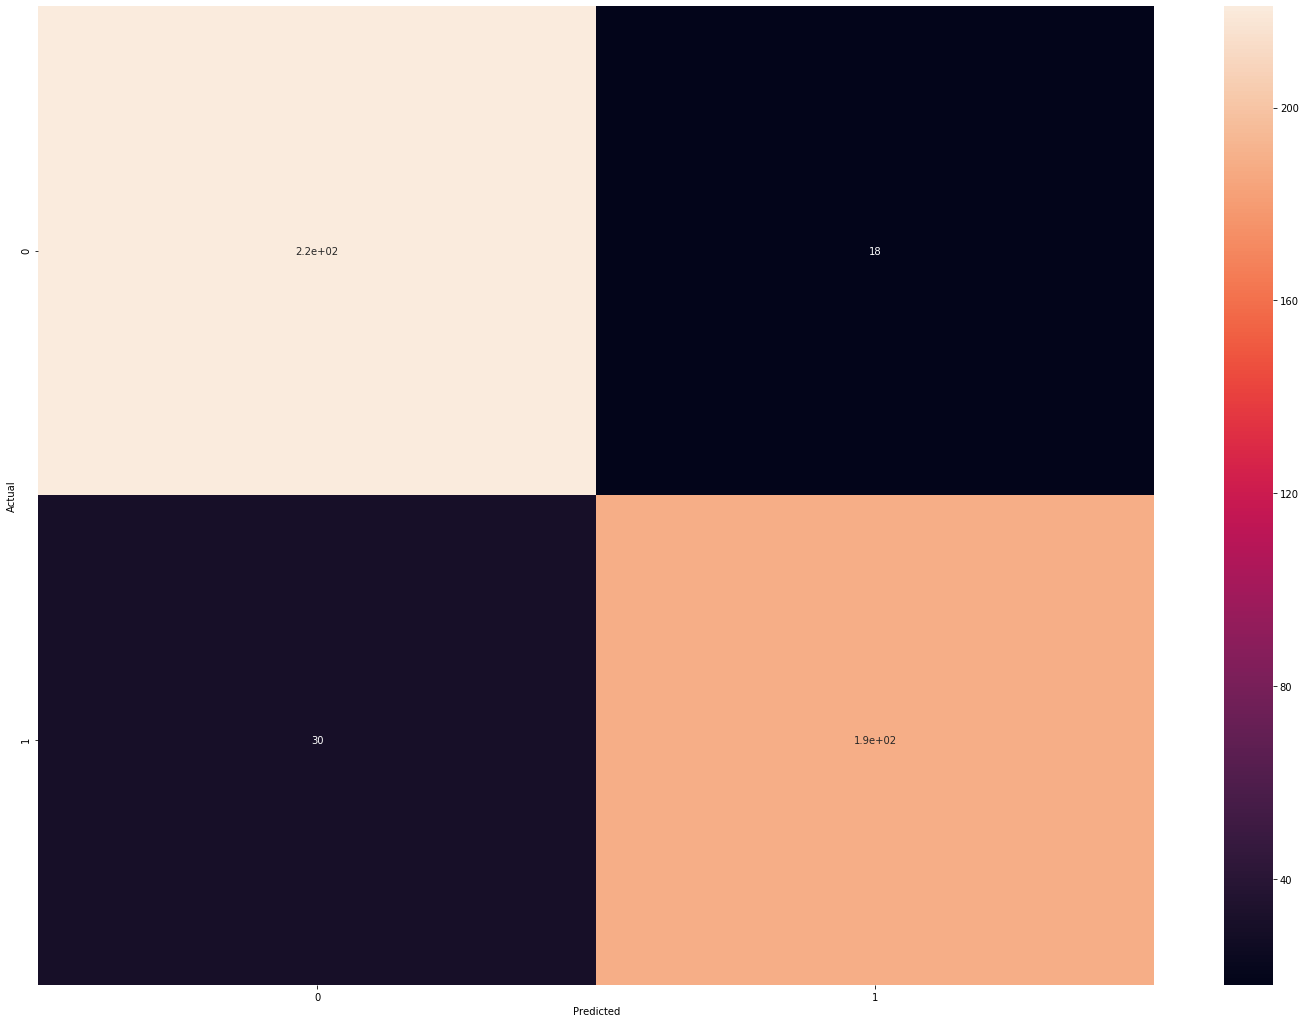

In [79]:
con_mat = confusion_matrix(y_test,testpred_lr)

sns.heatmap(con_mat,annot = True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Inference :

- False positive gives us the number of values that are representated as postive although being negative(type 1 error). Here it is 2.2e+02. Very low false positive number.


- False negative gives us the number of values that are detrmined as as negative but are positive (type 2 error). Here it is 30.


- True postiive gives us the number of values that are actually prdicted as yes and are yes. here it is 18.


- True negative gives us the number of values that are negative and are predicted as negative as well. here it is 1.9e+02.

In [78]:
print('Classification report of Train data :','\n',classification_report(y_train,trainpred_lr),'\n')
print('Classification report of Test data :','\n',classification_report(y_test,testpred_lr))

Classification report of Train data : 
               precision    recall  f1-score   support

           0       0.89      0.93      0.91       524
           1       0.93      0.88      0.91       544

    accuracy                           0.91      1068
   macro avg       0.91      0.91      0.91      1068
weighted avg       0.91      0.91      0.91      1068
 

Classification report of Test data : 
               precision    recall  f1-score   support

           0       0.88      0.92      0.90       239
           1       0.91      0.86      0.89       219

    accuracy                           0.90       458
   macro avg       0.90      0.89      0.89       458
weighted avg       0.90      0.90      0.90       458



Inference :

- The accuracy score gives us the complete ratio of all the false and negative rates overall and their accuracy of predicting those values as yes or no attrtion.. Here it is 0.91 for train data and 0.90 for test data. The accuracy score is higher whcih is good but the data is almost same for train and test data showing a overfit coondition.

- The Precision score gives us the overall ratio of all the true postive rates. So the precision of a positive outcome is 0.89 and 0.88 for this data which can be considered as a good score.

- The recall score gives us the ratio of how many postive values with respect to the presence of negative/false values. The recall rate here is alo pretty high.

- F1 Score gives us the comparision between precision and recll showing whther there is a good prediction of attrtion values taking into consideration the positive as well as negative values. The f1 score is alos 0.91 and 0.90 for class 0 and 0.91 and 0.89 for class1 which indicates a good accuracy.

- Overall the model can be passed as being is in overfit condition.

In [82]:
# determining the cohen kappa score
# the cohen kappa score gives us the agrrement rate between the true and predicted values.
# It gives us the overall accuracy of performance for the model

round(cohen_kappa_score(y_test,testpred_lr),2)

0.79

- The cohen kappa scre for the logistic regression model is 0.79 which indicates a moderate accuracy the model for prediction of the attrition classes.

In [83]:
# Let's build a model using the scikit library function to identify the significant features

sm_model = sma.Logit(y_train,x_train).fit()
sm_model.summary()

Optimization terminated successfully.
         Current function value: 0.241198
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1068
Model:                          Logit   Df Residuals:                     1022
Method:                           MLE   Df Model:                           45
Date:                Wed, 05 Apr 2023   Pseudo R-squ.:                  0.6519
Time:                        06:22:53   Log-Likelihood:                -257.60
converged:                       True   LL-Null:                       -740.09
Covariance Type:            nonrobust   LLR p-value:                6.213e-173
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                 1.0655      0.271      3.926      0.000       0.534       1.598
Age                                  -0.0709      0.163     -0.435      0.663      -0.390       0.249
DailyRate                            -0.0748      0.111     -0.671      0.502      -0.293       0.144
DistanceFromHome                      0.2721      0.114      2.391      0.017       0.049       0.495
Education                            -0.2553      0.117     -2.187      0.029      -0.484      -0.026
EmployeeNumber                       -0.0879      0.116     -0.760      0.447      -0.315       0.139
EnvironmentSatisfaction              -0.4042      0.125     -3.227      0.001      -0.650      -0.159
HourlyRate                           -0.0248      0.113     -0.219      0.827      -0.247       0.197
JobInvolvement                       -0.4394      0.119     -3.708      0.000      -0.672      -0.207
JobLevel                             -1.1356      0.439     -2.587      0.010      -1.996      -0.275
JobSatisfaction                      -0.5261      0.119     -4.417      0.000      -0.760      -0.293
MonthlyIncome                         0.5701      0.441      1.293      0.196      -0.294       1.435
MonthlyRate                          -0.1500      0.120     -1.253      0.210      -0.385       0.085
NumCompaniesWorked                    0.3755      0.124      3.039      0.002       0.133       0.618
PercentSalaryHike                     0.1354      0.171      0.791      0.429      -0.200       0.471
PerformanceRating                    -0.1486      0.167     -0.889      0.374      -0.476       0.179
RelationshipSatisfaction             -0.3725      0.117     -3.193      0.001      -0.601      -0.144
StockOptionLevel                     -0.4179      0.147     -2.852      0.004      -0.705      -0.131
TotalWorkingYears                    -0.4021      0.295     -1.362      0.173      -0.981       0.176
TrainingTimesLastYear                -0.4466      0.130     -3.438      0.001      -0.701      -0.192
WorkLifeBalance                      -0.2850      0.119     -2.396      0.017      -0.518      -0.052
YearsAtCompany                        0.2856      0.295      0.967      0.334      -0.293       0.864
YearsInCurrentRole                   -0.4257      0.213     -2.002      0.045      -0.843      -0.009
YearsSinceLastPromotion               0.5484      0.154      3.553      0.000       0.246       0.851
YearsWithCurrManager                 -0.2326      0.218     -1.068      0.285      -0.659       0.194
BusinessTravel_Travel_Frequently      0.2311      0.150      1.543      0.123      -0.062       0.525
BusinessTravel_Travel_Rarely          0.1110      0.170      0.651      0.515      -0.223       0.445
Department_Research & Development    -1.7355      0.561     -3.091      0.002      -2.836      -0.635
Department_Sales                     -0.1387      0.695     -0.199      0.842  

##### Inference :

- The pvalue of each variable helps us identify the significance of each column.
- If pvalue is greater than 0.05 then the variable is significant.
- Age, hourlyrate, monthlyincome, monthly rate, percent salaryhike, performance rating, totalworking years, yearsatcompany, years with currentmanager are the numerical columns that play a significant role in model building.
- Businesstravel, gender, jobrole, maritial_status are the categorical columns that show a significance with respect tot heir classes.

### Steps to improve overall efficiency of the model. 

##### Model 2 ( Decision tree ):

- Although we have determined some columns on the basis of their significance, we can't completely rule out their influence as there are categorical columns with classes that contribute and also do not contribute to the target variable.


- A decision tree algorithm works ina way where the branches of each node represents the classes and leaf nodes represent the outcome for each of these columns.


- A decision tree algorithm will help us build a model where we can take into considration the classes of the columns and build with the best parameters.


- We will also be performing hyper parameter tuning for the same.

In [86]:
dt = DecisionTreeClassifier()

# parameters

params = [{'criterion':['entropy','gini'],
          'max_features':['sqrt','log2'],
          'max_depth':range(2,5),
          'min_samples_split':range(2,5)}]

# conducting hyper parameter tuning for the optimum parameters using grid search cv.

tree_grid = GridSearchCV(estimator = dt, param_grid=params,cv = 3)

tree_grid.fit(xtrain,ytrain)

tree_grid.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'log2',
 'min_samples_split': 3}

In [87]:
# building a model with the selected parameters

dt = DecisionTreeClassifier(criterion = tree_grid.best_params_.get('criterion'),
                           max_features= tree_grid.best_params_.get('max_features'),
                           max_depth=tree_grid.best_params_.get('max_depth'),
                           min_samples_split=tree_grid.best_params_.get('min_samples_split'))

dt_model = dt.fit(xtrain,ytrain)

trainpred_dt = dt_model.predict(xtrain)
testpred_dt = dt_model.predict(xtest)
pred2 = dt_model.predict_proba(xtest)
predproba_dt = pred2[:,1]

print('Classification report of Train data :','\n',classification_report(ytrain,trainpred_dt),'\n')
print('Classification report of Test data :','\n',classification_report(ytest,testpred_dt),'\n')
print('Cohen kappa score :',round(cohen_kappa_score(ytest,testpred_dt),2))

Classification report of Train data : 
               precision    recall  f1-score   support

           0       0.78      0.74      0.76       524
           1       0.76      0.81      0.78       544

    accuracy                           0.77      1068
   macro avg       0.77      0.77      0.77      1068
weighted avg       0.77      0.77      0.77      1068
 

Classification report of Test data : 
               precision    recall  f1-score   support

           0       0.75      0.69      0.72       239
           1       0.69      0.75      0.72       219

    accuracy                           0.72       458
   macro avg       0.72      0.72      0.72       458
weighted avg       0.72      0.72      0.72       458
 

Cohen kappa score : 0.44


- The performance of the model has dropped.
- The accuracy score is low and has a significance difference for train and test set.
- Cohen kappa score is also low indicating the overall performance of the model for predicting the attrtion of employees is low.

##### Model 3 (XGBoost):

- XGboost model is a boosting technique where the impurities in the data does. not affect the perfomrmance of the data.
- XGBoost algorithm wrks optimumly with available data to build a model with better accuracy.
- Using the hyper parameter tuning technique we can procure the optimum parametets to get desired results.

In [91]:
xgb = XGBClassifier()

params = [{'learning_rate':[0.1,0.3,0.5,0.7],
          'gamma':[1,3,5,7],
          'max_depth':range(2,5)}]

xgb_grid = GridSearchCV(estimator=xgb,param_grid=params,cv = 3)

xgb_grid.fit(xtrain,ytrain)

GridSearchCV(cv=3, estimator=XGBClassifier(),
             param_grid=[{'gamma': [1, 3, 5, 7],
                          'learning_rate': [0.1, 0.3, 0.5, 0.7],
                          'max_depth': range(2, 5)}])

In [92]:
xgb_grid.best_estimator_

XGBClassifier(gamma=1, learning_rate=0.3, max_depth=2)

In [100]:
xgb = XGBClassifier(learning_rate= 0.3, max_depth=2, gamma=1)

xgb_model = xgb.fit(xtrain,ytrain)

trainpred_xgb = xgb_model.predict(xtrain)
testpred_xgb = xgb_model.predict(xtest)
pred3 = xgb_model.predict_proba(xtest)
predproba_xgb = pred3[:,1]

print('Classification report of Train data :','\n',classification_report(ytrain,trainpred_xgb),'\n')
print('Classification report of Test data :','\n',classification_report(ytest,testpred_xgb),'\n')
print('Cohen kappa score :',round(cohen_kappa_score(ytest,testpred_xgb),2))

Classification report of Train data : 
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       524
           1       0.99      0.96      0.98       544

    accuracy                           0.98      1068
   macro avg       0.98      0.98      0.98      1068
weighted avg       0.98      0.98      0.98      1068
 

Classification report of Test data : 
               precision    recall  f1-score   support

           0       0.90      0.90      0.90       239
           1       0.89      0.89      0.89       219

    accuracy                           0.89       458
   macro avg       0.89      0.89      0.89       458
weighted avg       0.89      0.89      0.89       458
 

Cohen kappa score : 0.79


- Here the accuracy score has a slightly bigger difference for train and test set.
- However it is high for both.
- The cohen kappa score also indicates a moderately high agreement.

##### Model 4 (Ada boost - with selected features):

- For the following model we will be using selected features from earlier for model building.
- ADA boost rakes up number of estimators upto which the variables can be estimated for the best results.


In [96]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [97]:
feat = df[['Age','HourlyRate','MonthlyIncome','MonthlyRate','PercentSalaryHike','PerformanceRating',
          'TotalWorkingYears','YearsAtCompany','YearsWithCurrManager','BusinessTravel',
          'JobRole','MaritalStatus','Gender','Attrition']]

In [98]:
# encoding the data

feat_enc = pd.get_dummies(feat,drop_first=True)

In [99]:
# X and Y

X = df_enc.drop('Attrition',axis = 1)
Y = df_enc['Attrition']

# performing smote
sm = SMOTE(sampling_strategy = 'auto',random_state = 1)
X_new,Y_new = sm.fit_resample(X,Y)
df_smote = pd.concat([X_new,Y_new])

# Splitting the data

xtrain, xtest, ytrain,ytest = train_test_split(X_new,Y_new,test_size = 0.3,random_state = 1)


In [102]:
adb = AdaBoostClassifier(n_estimators=150,random_state=1)

adb_model = adb.fit(xtrain,ytrain)
trainpred_adb = adb_model.predict(xtrain)
testpred_adb = adb_model.predict(xtest)
pred4 = adb_model.predict_proba(xtest)
predproba_adb = pred4[:,1]

print('Classification report of Train data :','\n',classification_report(ytrain,trainpred_adb),'\n')
print('Classification report of Test data :','\n',classification_report(ytest,testpred_adb),'\n')
print('Cohen kappa score :',round(cohen_kappa_score(ytest,testpred_adb),2))

Classification report of Train data : 
               precision    recall  f1-score   support

           0       0.95      0.96      0.96       524
           1       0.96      0.95      0.96       544

    accuracy                           0.96      1068
   macro avg       0.96      0.96      0.96      1068
weighted avg       0.96      0.96      0.96      1068
 

Classification report of Test data : 
               precision    recall  f1-score   support

           0       0.88      0.88      0.88       239
           1       0.87      0.87      0.87       219

    accuracy                           0.87       458
   macro avg       0.87      0.87      0.87       458
weighted avg       0.87      0.87      0.87       458
 

Cohen kappa score : 0.75


- The accuracy score has a significant difference in the train and test data.
- The cohen kappa score shows a moderately high accuracy.

##### 1. Plotting a roc curve and auc score plot for selection of the best model.

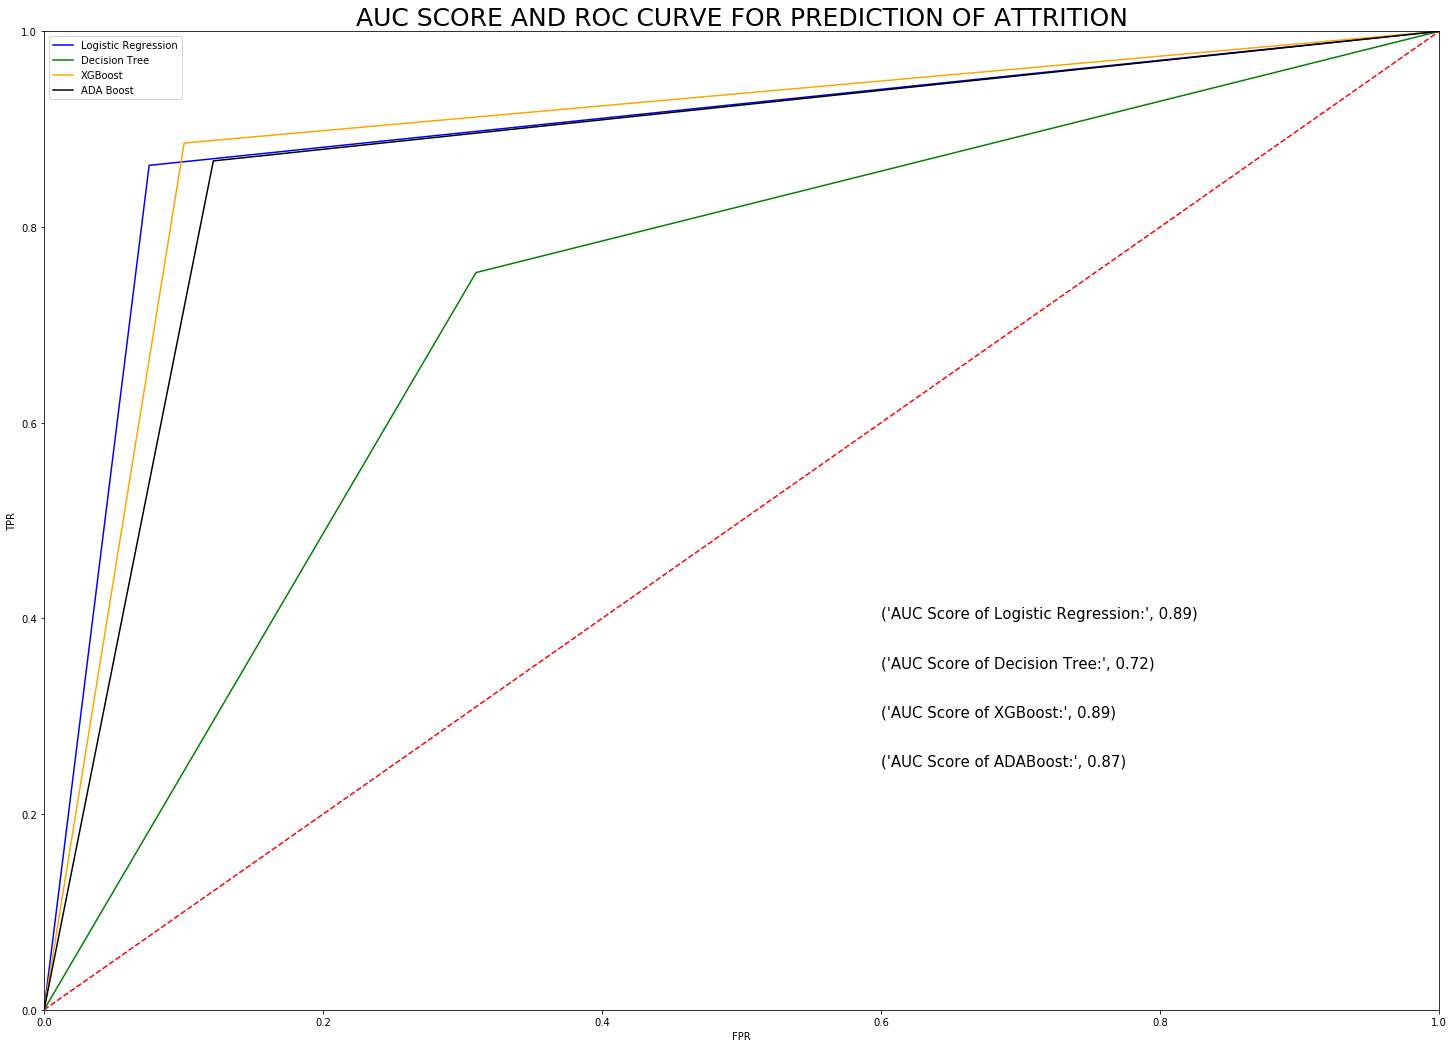

In [110]:
# for logistic regression model
fpr,tpr,thresholds = roc_curve(y_test,testpred_lr)
plt.plot(fpr,tpr,label = 'Logistic Regression',color = 'blue')

# for decision tree
fpr,tpr,thresholds = roc_curve(ytest,testpred_dt)
plt.plot(fpr,tpr,label = 'Decision Tree',color = 'green')

# for XGboost
fpr,tpr,thresholds = roc_curve(ytest,testpred_xgb)
plt.plot(fpr,tpr,label = 'XGBoost',color = 'orange')

# for AdaBoost
fpr,tpr,thresholds = roc_curve(ytest,testpred_adb)
plt.plot(fpr,tpr,label = 'ADA Boost',color = 'black')

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])

plt.plot([0,1],[0,1],'r--')

# for auc score of logistic regression
auc_lr = round(roc_auc_score(ytest,testpred_lr),2)
plt.text(x = 0.6, y = 0.4, s = ('AUC Score of Logistic Regression:',auc_lr),fontsize = 15)

# for auc score of decision tree
auc_dt = round(roc_auc_score(ytest,testpred_dt),2)
plt.text(x = 0.6, y = 0.35, s = ('AUC Score of Decision Tree:',auc_dt),fontsize = 15)

# for auc score of xgboost
auc_xgb = round(roc_auc_score(ytest,testpred_xgb),2)
plt.text(x = 0.6, y = 0.3, s = ('AUC Score of XGBoost:',auc_xgb),fontsize=15)

# for auc score of adaboost
auc_adb = round(roc_auc_score(ytest,testpred_adb),2)
plt.text(x = 0.6, y = 0.25, s = ('AUC Score of ADABoost:',auc_adb),fontsize=15)

plt.title('AUC SCORE AND ROC CURVE FOR PREDICTION OF ATTRITION',fontsize = 25)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

- Here the AUC score deterimines the area under the curve covered by each model.
- As we can see that XGBoost and Logistic regression has similar auc score 0.89.

By Comparing the classification report of both these models the recall ratio gives us the accuracy of predictions being predicted correctly, considering the recall for each model, XGBoost model seems to be the best model.

##### 2. Business Interpretation :

- Predicting the possibility of Attrition of an employee was the target to be acahieved.
- Multiple variables based on personal information(gender,maritial status), monthly information(mothly rate etc.), and more were utilised to understand the factors that can cause the attrition.
- However the vairiables hourly rate, Monthly rate and monthly income, alongwith the age, gender, years with current manager are the variables that play a significant role.
- We can take these variables into consideration while making business decisions and plans for optimum results.

##### 3. What changes from the base model had the most effect on model performance?

- The base model was a simple logistic regression model build on the data.
- An XGBoost model was built with hyper parameter tuning(for best parameters) which played a major role in building the model. XGBoost also helped the model learn the patterns for each variable , variable with classes and their outcomes accordingly.

##### 4. What are the key risks to your results and interpretation?

- Although the model build has a moderately good accuracy score, there is a chance of misinterpretation due to the over sampling of classes done.
- Since the classes were imbalanced oversampling was performed for better results, however this could have led to overfitting of the model which can be risky.
- Since the size of the data was smaller, there is a possibility of repetitve patterns were over learned by the model, and new variables, data might get wrongly predicted.